<a href="https://colab.research.google.com/github/mateuszklimczyk97/data-science-bootcamp/blob/main/06_uczenie_maszynowe/04_regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import bibliotek

In [2]:
import sklearn
import numpy as np

### Regresja Liniowa - wprowadzenie

### Podstawowe założenia regresji liniowej

*   mamy zależność liniową
*   wariancja reszt jest taka sama dla wszystkich obserwacji
*   brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)







### Wygenerowanie danych
####Przykład w $R^2$:
$Y=w_0 + w_1X_1$


In [7]:
X = np.arange(0,50,0.5)
noise = 10 * np.random.randn(100)
y=2*X + 100 + noise
X = X.reshape(-1,1)

print('Rozmiar X:', X.shape)
print('Rozmiar Y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar Y: (100,)


### Podział danych na zbiór treningowy i testowy

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train shape: (75,)
y_test shape: (25,)


### Wizualizacja

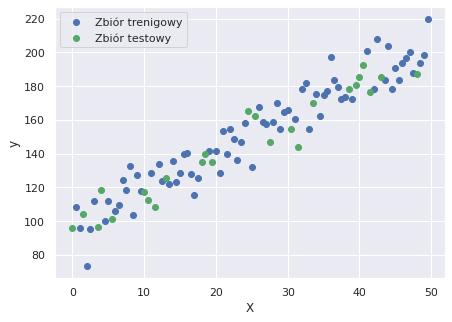

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7,5))
plt.scatter(X_train,y_train,c='b',label='Zbiór trenigowy')
plt.scatter(X_test,y_test,c='g',label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
_ = plt.legend()

### Regresja liniowa

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.14789393]
97.91248917498194




Rozwiązaniem jest prosta o postaci: $Y=97.91 + 2.15\cdot X_1$

### Wizualizacja zbioru treningowego i dopasowanego modelu [KMNK]

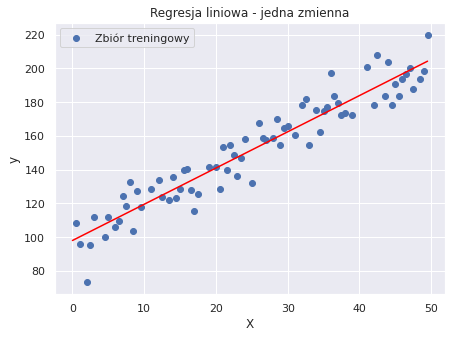

In [17]:
plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.scatter(X_train,y_train, c='b',label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0]*X, c='red')
plt.xlabel('X')
plt.ylabel('y')
_ = plt.legend()

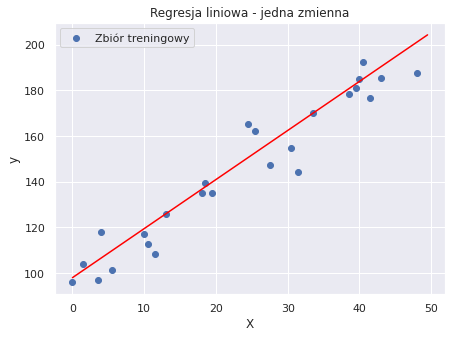

In [20]:
y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.scatter(X_test,y_test, c='b',label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0]*X, c='red')
plt.xlabel('X')
plt.ylabel('y')
_ = plt.legend()

### Ocena modelu
Metoda score() zwraca współczynnik determinacji $R^2$ naszej predykcji.

Współczynnik determinacji jest zdefiniowany jako:


$R^{2} =1 - \frac{\sum_{t=1}^{n}(y_{pred, t} - \bar{y}_{true} )^2}{\sum_{t=1}^{n}(y_{true, t} - \bar{y}_{true} )^2}$

Współczynnik determinacji jest miarą stopnia dopasowania modelu do próby. Dopasowanie modelu jest tym lepsze im wartość $R^2$ jest bliżej 1.

In [21]:
lin_reg.score(X_test,y_test)

0.922710025231468

In [ ]:
lin_reg.score? #dokumentacja metody score

### Przykład złego zastosowania regresji liniowej

[-1.10871408]
16.84473007118388


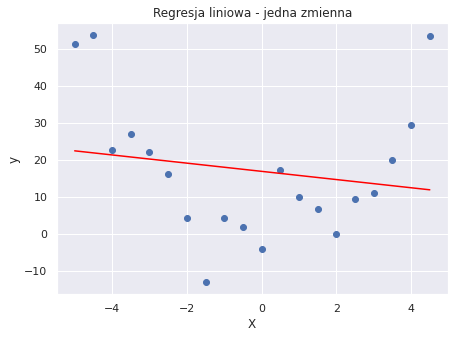

In [36]:
X = np.arange(-5,5,0.5)
noise = 10 * np.random.randn(20)
y = 2*(X**2)+4+noise
X = X.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7,5))
plt.title('Regresja liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0]*X, c='red')
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
_ = plt.show()

W tym przypadku lepszym rozwiazaniem byłaby regresja wielomianowa